In [5]:
import defense
import tensorflow as tf
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
import numpy as np
from albumentations import *

In [2]:
config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
sess = tf.Session(config=config)

In [3]:
def l2_distortion(img1, img2):
    if len(img1.shape) == 4:
        n = img1.shape[0]
        l = np.mean(np.sqrt(np.sum((img1.reshape((n, -1)) - img2.reshape((n, -1)))
                                   ** 2, axis=1) / np.product(img1.shape[1:])), axis=0)
    else:
        l = np.sqrt(np.sum(img1 - img2) ** 2 / np.product(img1.shape))

    return l

def ssim_score(cleandata,data):
#     cleandata = (cleandata * 255).astype('uint8')
#     data = (data * 255).astype('uint8')
    SSIM = []
    for i in range(cleandata.shape[0]):
        ssim = compare_ssim(cleandata[i], data[i], multichannel=True, data_range = 1.0)
        SSIM.append(ssim)
    SSIM = np.asarray(SSIM)
    return SSIM.mean()

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse)) 
    return psnr 

def psnr_score(cleandata,data):
    PSNR_list = []
    for i in range(cleandata.shape[0]):
        psnr = PSNR(cleandata[i], data[i])
        PSNR_list.append(psnr)
    PSNR_list = np.asarray(PSNR_list)
    return PSNR_list.mean()

In [6]:
# the seleted data from the imagenet validation set
cleandata = np.load("./data/clean100data.npy")
cleanlabel = np.load("./data/clean100label.npy")

In [7]:
def defended(imgbatch):
    defbatch = np.zeros_like(imgbatch)
    for i in range(cleandata.shape[0]):
        defbatch[i]=defense.defend_WebP(cleandata[i])
    return defbatch

In [8]:
# middata = cleandata+0.01
data = defended(cleandata)

In [12]:
print(l2_distortion(cleandata,data))
print(ssim_score(cleandata,data))
print(psnr_score(cleandata*255,data*255))

0.037828145686588564
0.8599966445853029
29.10386318997043


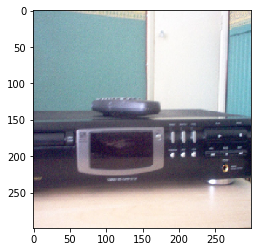

In [162]:
plt.imshow(augimg(cleandata[0]))